In [1]:
setwd('/import/liujing/data/scRNA/')
scRNA = readRDS('scRNA.rds')

The legacy packages maptools, rgdal, and rgeos, underpinning the sp package,
which was just loaded, will retire in October 2023.
Please refer to R-spatial evolution reports for details, especially
https://r-spatial.org/r/2023/05/15/evolution4.html.
It may be desirable to make the sf package available;
package maintainers should consider adding sf to Suggests:.
The sp package is now running under evolution status 2
     (status 2 uses the sf package in place of rgdal)



In [2]:
library(Seurat)

Warning message:
"package 'Seurat' was built under R version 4.2.3"
Attaching SeuratObject



In [3]:
Idents(scRNA) = 'celltype'

In [4]:
mono =subset(scRNA,idents = 'Monocyte')

In [5]:
table(mono$celltype)


Monocyte 
     512 

In [6]:
subset

function (x, ...) 
UseMethod("subset")
<bytecode: 0x558bbdeee218>
<environment: namespace:base>

In [7]:
packageVersion('Seurat')

[1] '4.3.0.1'

In [10]:
ifnb.list <- SplitObject(mono, split.by = "group")

testAB.anchors <- FindIntegrationAnchors(object.list = ifnb.list, dims = 1:20)
testAB.integrated <- IntegrateData(anchorset = testAB.anchors, dims = 1:20)

DefaultAssay(testAB.integrated) <- "integrated"
# Run the standard workflow for visualization and clustering
testAB.integrated <- ScaleData(testAB.integrated, features = rownames(testAB.integrated))
testAB.integrated <- RunPCA(testAB.integrated, npcs = 20, verbose = FALSE)
testAB.integrated <- FindNeighbors(testAB.integrated, dims = 1:20)
testAB.integrated <- FindClusters(testAB.integrated, resolution = 0.1)
testAB.integrated <- RunUMAP(testAB.integrated, dims = 1:20)
testAB.integrated <- RunTSNE(testAB.integrated, dims = 1:20)

immune.combined = testAB.integrated

Computing 2000 integration features

Scaling features for provided objects

Finding all pairwise anchors

Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 927 anchors

Filtering anchors

	Retained 860 anchors

Merging dataset 1 into 2

Extracting anchors for merged samples

Finding integration vectors

Finding integration vector weights

Integrating data

Centering and scaling data matrix

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 512
Number of edges: 20306

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9547
Number of communities: 4
Elapsed time: 0 seconds


Warning message:
"The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session"
13:16:37 UMAP embedding parameters a = 0.9922 b = 1.112

13:16:37 Read 512 rows and found 20 numeric columns

13:16:37 Using Annoy for neighbor search, n_neighbors = 30

13:16:37 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

13:16:37 Writing NN index file to temp file /tmp/RtmpSvRAxI/file3aea063fa7d37

13:16:37 Searching Annoy index using 1 thread, search_k = 3000

13:16:37 Annoy recall = 100%

13:16:37 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors =

In [11]:
scRNA =immune.combined

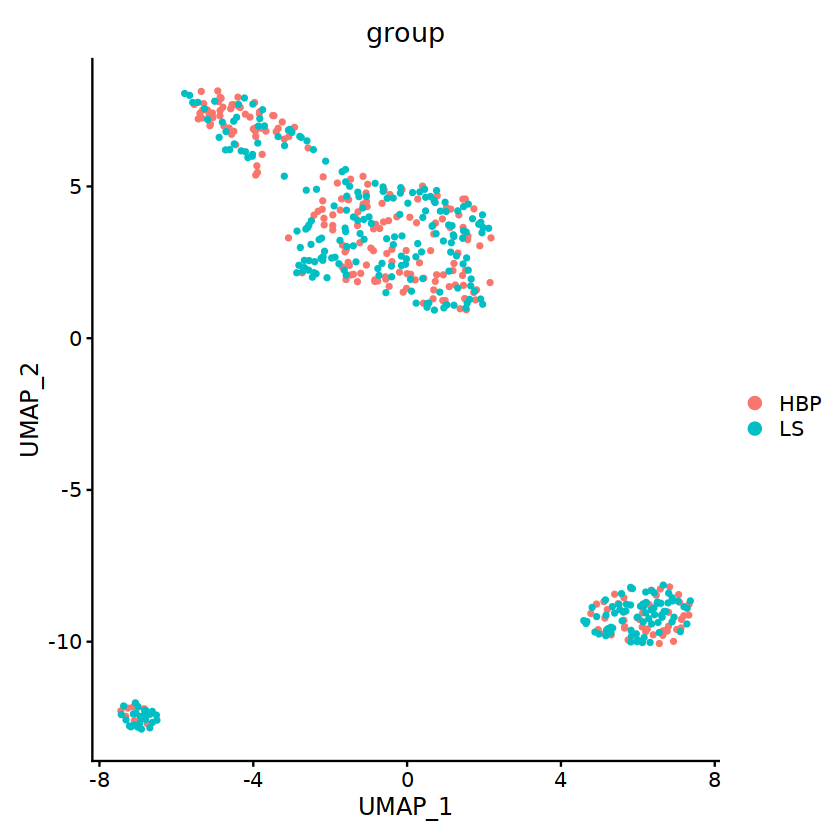

In [13]:
DimPlot(scRNA, reduction = "umap", group.by = "group")

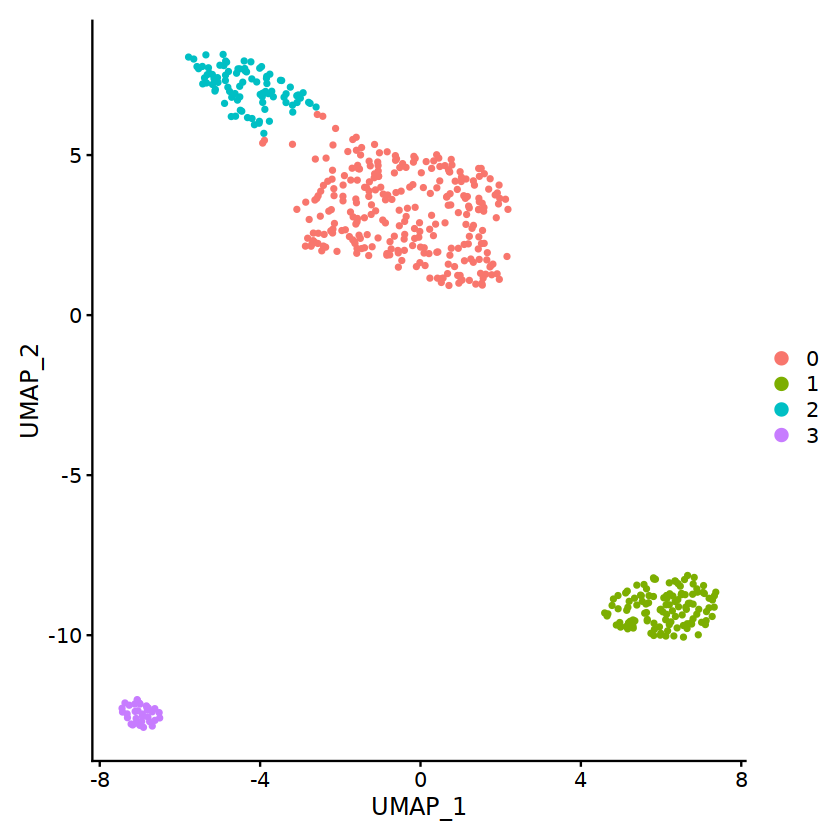

In [25]:
DimPlot(scRNA)

In [15]:
DefaultAssay(scRNA) = 'RNA'

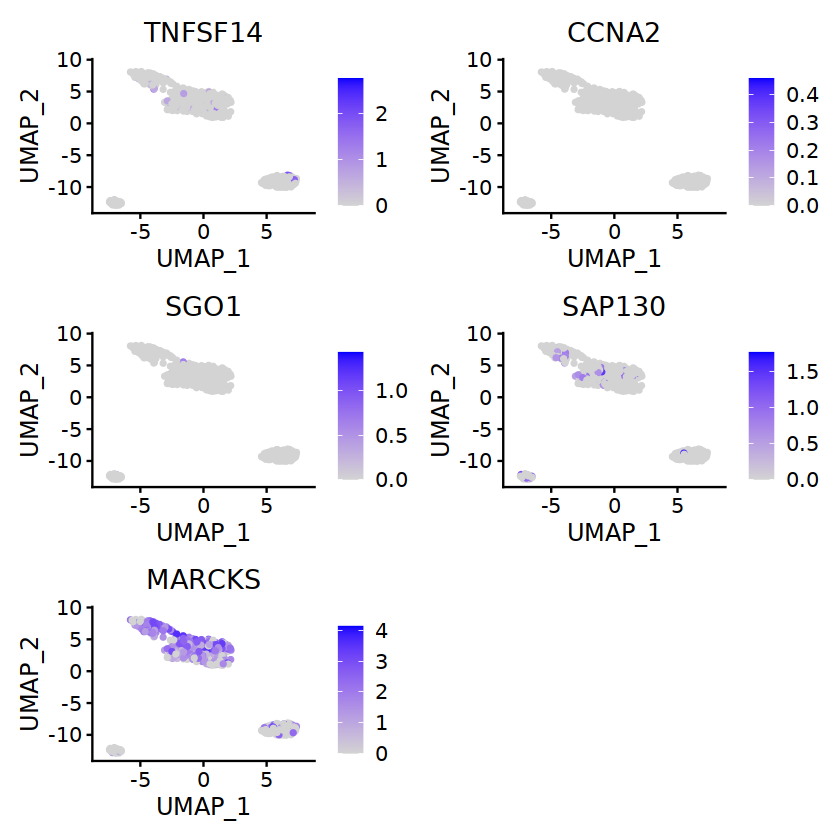

In [19]:
FeaturePlot(scRNA,features = c('TNFSF14','CCNA2','SGO1','SAP130','MARCKS'))

In [21]:
Idents(scRNA) = 'seurat_clusters'

In [22]:
DefaultAssay(scRNA) = 'RNA'

In [23]:
sce.markers <- FindAllMarkers(object = scRNA, only.pos = TRUE, 
                              min.pct = 0.25, 
                              thresh.use = 0.25)
 

library(dplyr) 
# 不同seurat版本的 avg_logFC 不一样 
top5 <- sce.markers %>% group_by(cluster) %>% top_n(5, avg_log2FC)

Calculating cluster 0

Calculating cluster 1

Calculating cluster 2

Calculating cluster 3



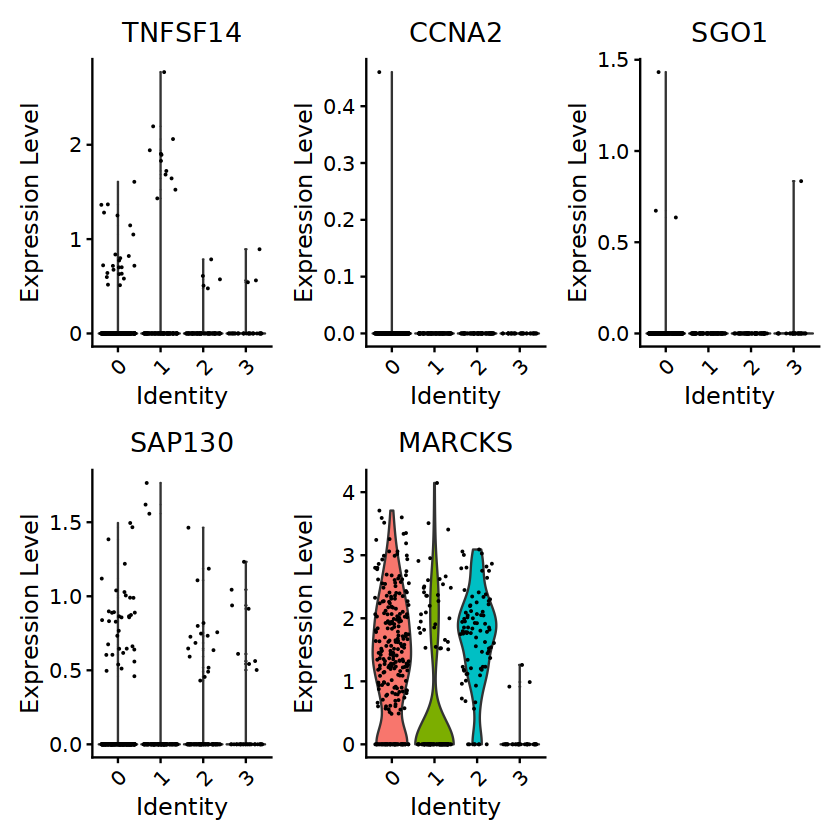

In [29]:

VlnPlot(scRNA,features = c('TNFSF14','CCNA2','SGO1','SAP130','MARCKS'))